In [9]:
# Put together a comprehensive code example
fpath_tiff = './stac/colombia/borde_soacha/borde_soacha_ortho-cog.tif'
fpath_geojson = './stac/colombia/borde_soacha/train-borde_soacha.geojson'

import json
import numpy as np
import geopandas as gpd
import rasterio
from pyproj import Proj
from rasterio.mask import mask
from rasterio.plot import show

In [10]:
df_roof_geometries = gpd.read_file(fpath_geojson)

with rasterio.open(fpath_tiff) as tiff:
            tiff_crs = tiff.crs.data
            df_roof_geometries['projected_geometry'] = (
                df_roof_geometries['geometry'].to_crs(tiff_crs)
            )
            
roof_geometries = (df_roof_geometries[['id', 'projected_geometry']].values)

1


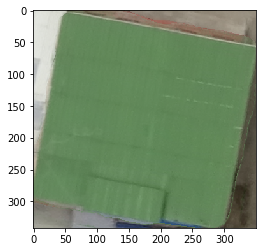

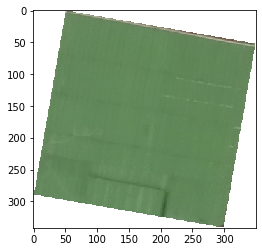

2


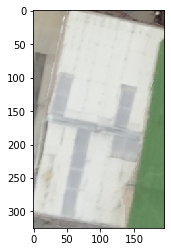

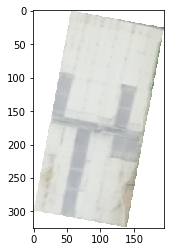

3


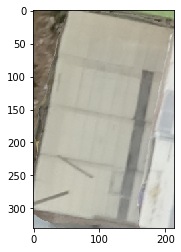

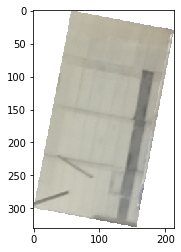

4


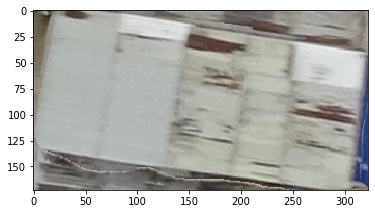

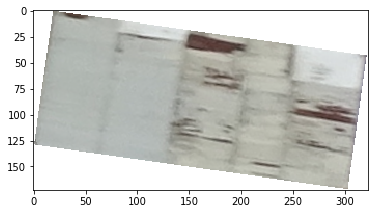

5


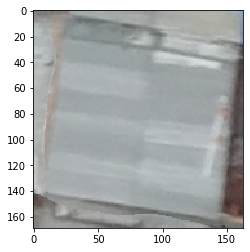

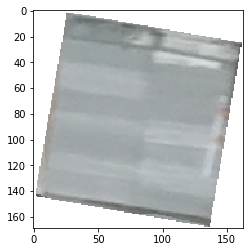

6


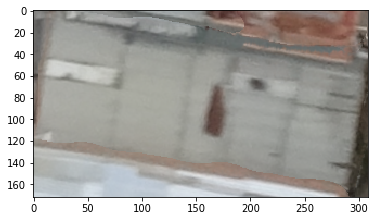

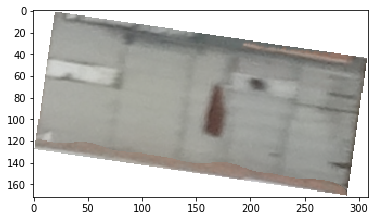

7


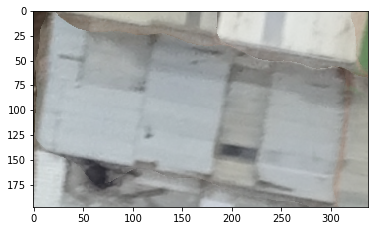

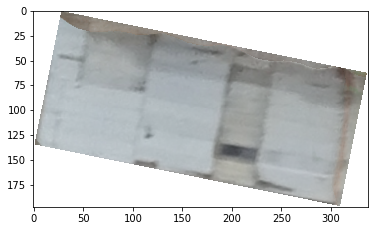

8


KeyboardInterrupt: 

In [24]:
i=0
with rasterio.open(fpath_tiff) as tiff:
    padding = 0.5
    for roof_id, projected_geometry in roof_geometries:
        i=i+1
        print(i)
        roof_image, _ = mask(
            tiff, [projected_geometry], crop=True, pad=True,
            filled=False, pad_width=padding
        )
        # show(roof_image)
        roof_image = np.transpose(roof_image, (1, 2, 0))
        roof_mask, _ = mask(
            tiff, [projected_geometry], crop=True, pad=True,
            filled=True, pad_width=padding
        )
        # show(roof_mask)
        
        

In [25]:
roof_mask.shape

(4, 198, 338)

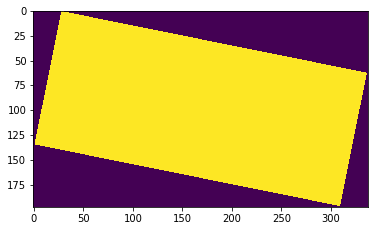

In [39]:
import matplotlib.pyplot as plt
plt.imshow(roof_mask[3,:,:])

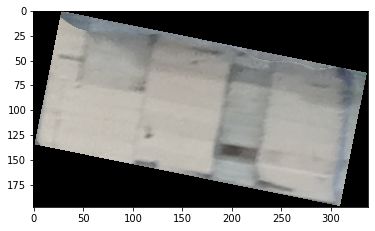

In [34]:
out_image = roof_mask

import numpy as np
import matplotlib.pyplot as plt

red = out_image[2]
green = out_image[1]
blue = out_image[0]

# # Function to normalize the grid values
# def normalize(array):
#     """Normalizes numpy arrays into scale 0.0 - 1.0"""
#     array_min, array_max = array.min(), array.max()
#     return ((array - array_min)/(array_max - array_min))

# # Normalize the bands
# redn = normalize(red)
# greenn = normalize(green)
# bluen = normalize(blue)

# Create RGB natural color composite
rgb = np.dstack((red, green, blue))

# Let's see how our color composite looks like
plt.imshow(rgb)

In [43]:
plt.imsave('rgb.jpg',rgb)